# Cryptocurrency analysis project

## Web Scraping

In [1]:
# Import necessary packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import os
import shutil
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Site URL
url="https://www.kaggle.com/datasets/artemburenok/cryprocurrency-prices-for-the-year?resource=download&select=BTC-USD.csv"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text
# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")
#print(soup.prettify()) # print the parsed data of html

In [2]:
#pip install kaggle


In [3]:
import kaggle

# set the API credentials
kaggle.api.authenticate()

# download the dataset
kaggle.api.dataset_download_files('artemburenok/cryprocurrency-prices-for-the-year', path='./data', unzip=True)


In [4]:
# Create a new directory to store the selected files
os.makedirs('./data_data', exist_ok=True)

# Define the list of files to select
selected_files = ['BTC-USD.csv', 'BCH-USD.csv', 'ETH-USD.csv', 'ETC-USD.csv', 'DOGE-USD.csv', 'SHIB-USD.csv', 'DAI-USD.csv', 'LTC-USD.csv']

# Copy the selected files to the new directory
for file_name in selected_files:
    src_path = f'./data/{file_name}'
    dst_path = f'./data_data/{file_name}'
    shutil.copy(src_path, dst_path)


## Data Cleaning - merging csv files

In [5]:
import pandas as pd
df1 = pd.read_csv('./data/BTC-USD.csv')
df2= pd.read_csv('./data/ETH-USD.csv')
df3= pd.read_csv('./data/BCH-USD.csv')
df4= pd.read_csv('./data/DAI-USD.csv')
df5= pd.read_csv('./data/DOGE-USD.csv')
df6= pd.read_csv('./data/ETC-USD.csv')

datasets = [df1,df2,df3,df4,df5,df6]

In [6]:
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-31,358.768494,361.003235,336.806213,343.052643,343.052643,3783477587
1,2021-01-01,342.979767,354.826416,334.560638,341.985657,341.985657,3490086847
2,2021-01-02,342.026672,365.390564,334.569183,354.599945,354.599945,4608719269
3,2021-01-03,354.650909,433.019073,354.650909,421.789856,421.789856,7273123207
4,2021-01-04,422.066254,462.204559,387.911804,407.936920,407.936920,8597472426


In [7]:
def addName(data,name):
    # add a new column named 'Currency' 
    for index, row in df1.iterrows():
        data.at[index, 'Currency'] = name

    # print the updated dataframe


addName(df1,'BTC')
addName(df2,'ETH')
addName(df3,'BCH')
addName(df4,'DAI')
addName(df5,'DOGE')
addName(df6,'ETC')

df1.head()

merge = pd.concat(datasets)

In [8]:
merge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Currency
424,2022-02-28,27.368704,30.115137,27.017731,30.115137,30.115137,447172107,ETC
425,2022-03-01,30.182611,31.268188,29.591187,30.311501,30.311501,519476943,ETC
426,2022-03-02,30.311943,30.537594,29.148619,29.539988,29.539988,423495882,ETC
427,2022-03-03,29.539799,31.512363,29.073954,30.219975,30.219975,614581526,ETC
428,2022-03-06,27.837343,28.041931,26.825302,26.946095,26.946095,273312768,ETC


In [9]:
merge.shape

(2574, 8)

In [10]:
merge.to_csv('merged.csv')

## Data Cleaning - adding calculated columns

In [11]:

# Load CSV into pandas dataframe
df = pd.read_csv('merged.csv')    #### "meged.csv" should be replaced with the correct file name

# Add new column that subtracts "Close" from "Open"
df.insert(7,column = "Difference", value=df["Open"]-df["Close"])

# Print first 5 rows of updated dataframe
print(df.head())

# Add new column that calculates percentage change of "Difference"
df.insert(7,column = "PercentageChange", value=(df['Difference'] / df['Close']) * 100)

# Print first 5 rows of updated dataframe
df.head()

# Save updated dataframe to a new CSV file
df.to_csv('NewFile.csv', index=False) ##### For the rest of the merged code "NewFile.csv" or whatever would ot be called should be used.

   Unnamed: 0        Date          Open          High           Low  \
0           0  2020-12-31  28841.574219  29244.876953  28201.992188   
1           1  2021-01-01  28994.009766  29600.626953  28803.585938   
2           2  2021-01-02  29376.455078  33155.117188  29091.181641   
3           3  2021-01-03  32129.408203  34608.558594  32052.316406   
4           4  2021-01-04  32810.949219  33440.218750  28722.755859   

          Close     Adj Close   Difference       Volume Currency  
0  29001.720703  29001.720703  -160.146484  46754964848      BTC  
1  29374.152344  29374.152344  -380.142578  40730301359      BTC  
2  32127.267578  32127.267578 -2750.812500  67865420765      BTC  
3  32782.023438  32782.023438  -652.615234  78665235202      BTC  
4  31971.914062  31971.914062   839.035156  81163475344      BTC  


In [12]:
# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from "Date" column and add it as "Month" column
df['Month'] = df['Date'].dt.month

# Add a new column "MonthStr" with month names
df['MonthStr'] = df['Date'].dt.strftime('%B')

# Print first few rows of updated dataframe
print(df.head())

# Save updated dataframe to a new CSV file
df.to_csv('NewFile.csv', index=False) ##### For the rest of the merged code "NewFile.csv" or whatever would ot be called should be used.


   Unnamed: 0       Date          Open          High           Low  \
0           0 2020-12-31  28841.574219  29244.876953  28201.992188   
1           1 2021-01-01  28994.009766  29600.626953  28803.585938   
2           2 2021-01-02  29376.455078  33155.117188  29091.181641   
3           3 2021-01-03  32129.408203  34608.558594  32052.316406   
4           4 2021-01-04  32810.949219  33440.218750  28722.755859   

          Close     Adj Close  PercentageChange   Difference       Volume  \
0  29001.720703  29001.720703         -0.552196  -160.146484  46754964848   
1  29374.152344  29374.152344         -1.294140  -380.142578  40730301359   
2  32127.267578  32127.267578         -8.562236 -2750.812500  67865420765   
3  32782.023438  32782.023438         -1.990772  -652.615234  78665235202   
4  31971.914062  31971.914062          2.624288   839.035156  81163475344   

  Currency  Month  MonthStr  
0      BTC     12  December  
1      BTC      1   January  
2      BTC      1   Januar

In [13]:
# Read the merged CSV file into a dataframe
df = pd.read_csv('NewFile.csv')

# Calculate the daily volatility
df['Volatility'] = df['Open'] - df['Close']

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the average volatility for each month
monthly_volatility = df.groupby('Month')['Volatility'].mean().reset_index()

# Rename the 'Volatility' column to 'AverageVolatility'
monthly_volatility.rename(columns={'Volatility': 'AverageVolatility'}, inplace=True)

# Merge the monthly volatility data with the original dataframe
merged_df = pd.merge(df, monthly_volatility, on='Month')

# Print the updated dataframe
merged_df.head()



,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,PercentageChange,Difference,Volume,Currency,Month,MonthStr,Volatility,AverageVolatility
0,0,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,-0.552196,-160.146484,46754964848,BTC,12,December,-160.146484,71.464429
1,335,2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,-0.562405,-321.863281,36858195307,BTC,12,December,-321.863281,71.464429
2,336,2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,1.309460,739.554688,32379968686,BTC,12,December,739.554688,71.464429
3,337,2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,5.430995,2910.917969,39789134215,BTC,12,December,2910.917969,71.464429
4,338,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,9.201445,4527.175781,61385677469,BTC,12,December,4527.175781,71.464429


In [14]:
# Save updated dataframe to a new CSV file
merged_df.to_csv('updated_file.csv', index=False)

## Data Modelling and Visualisation

### Linear Regression for months

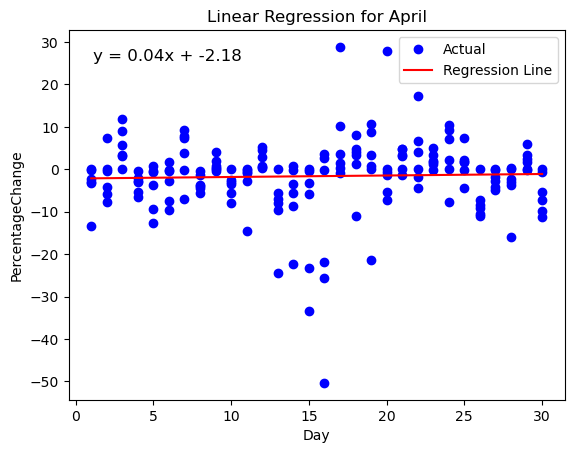

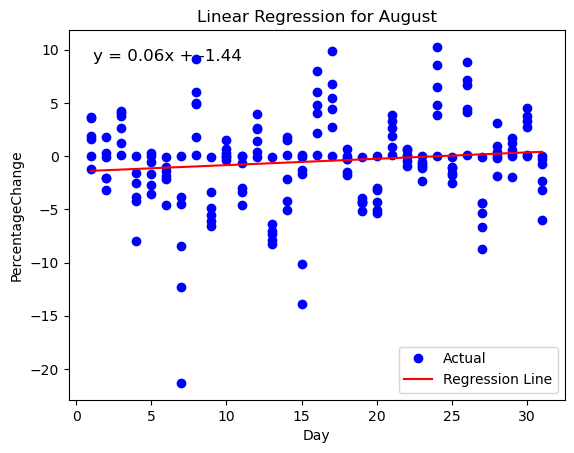

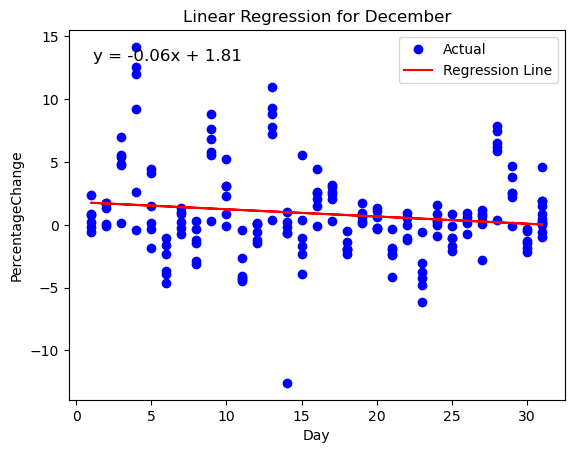

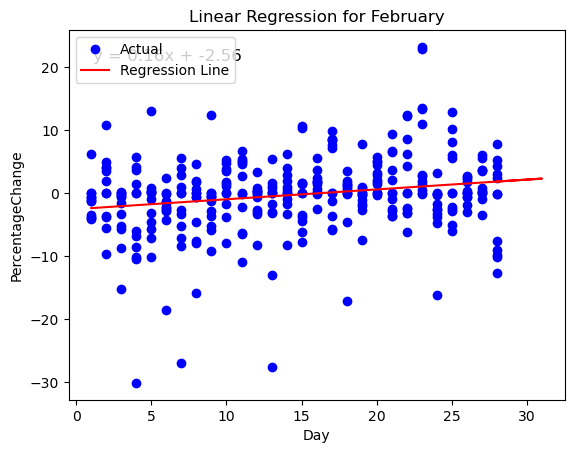

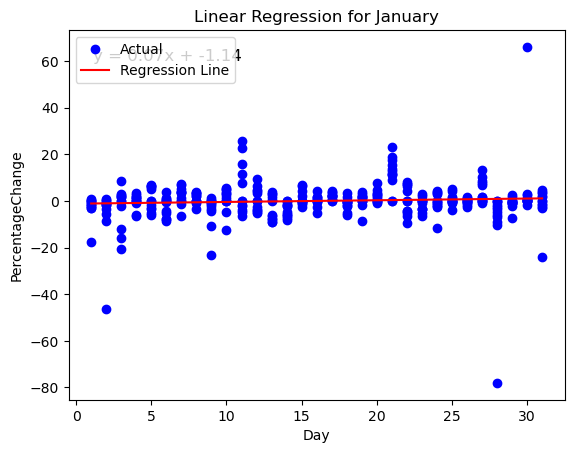

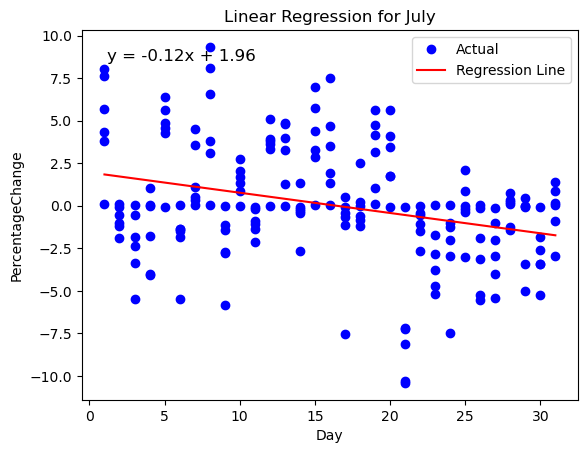

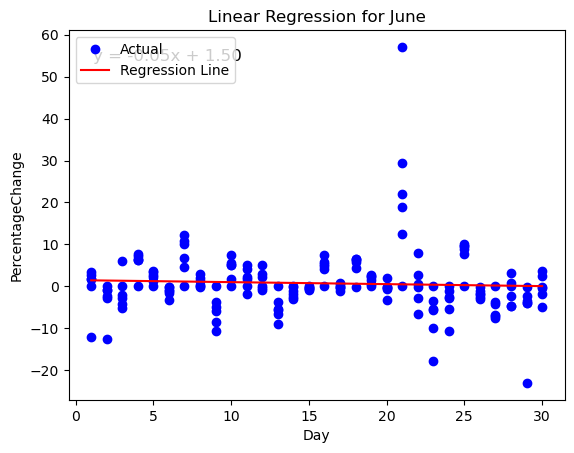

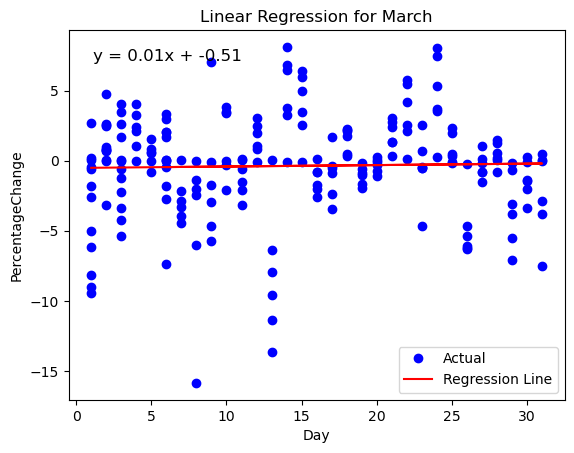

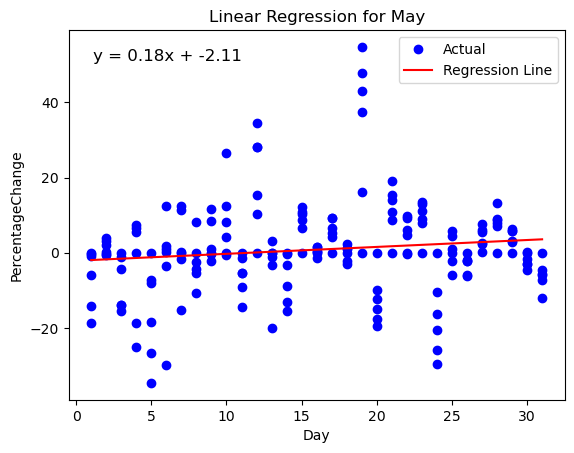

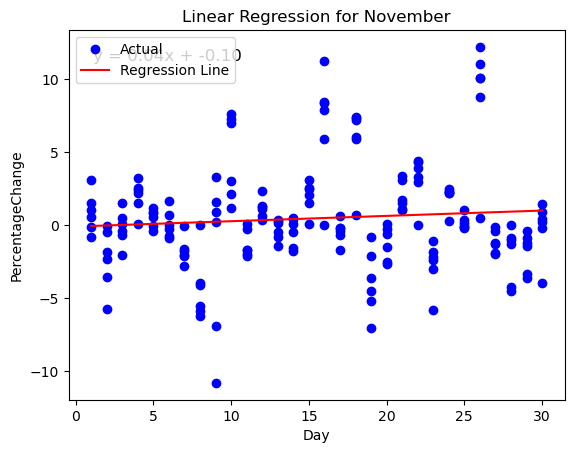

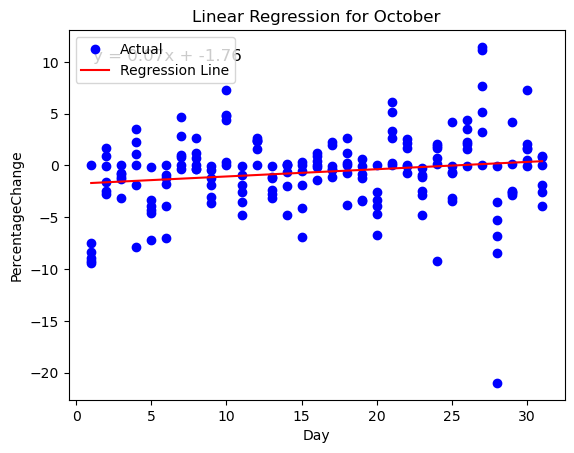

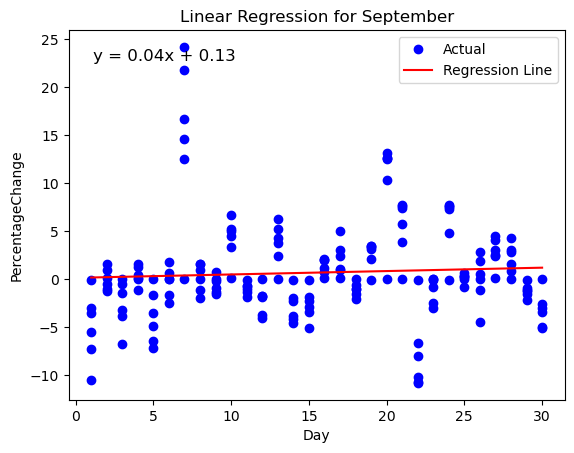

In [15]:
df = pd.read_csv('NewFile.csv')

# Group the data by month
grouped = df.groupby('MonthStr')

# Perform linear regression for each month
for month, data in grouped:
    # Prepare the data
    x_dates = pd.to_datetime(data['Date'])
    y = data['PercentageChange']
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(x_dates.dt.day.values.reshape(-1, 1), y)
    
    # Predict the values based on the regression model
    x_pred = pd.date_range(start=x_dates.min(), end=x_dates.max(), freq='D')
    y_pred = model.predict(x_pred.day.values.reshape(-1, 1))
    
    # Get the regression line equation
    slope = model.coef_[0]
    intercept = model.intercept_
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    
    # Plot the regression line
    plt.plot(x_dates.dt.day, y, 'bo', label='Actual')
    plt.plot(x_pred.day, y_pred, 'r-', label='Regression Line')
    plt.title(f'Linear Regression for {month}')
    plt.xlabel('Day')
    plt.ylabel('PercentageChange')
    plt.legend()
    
    # Display the equation in the graph
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.show()


### Linear Regression for Currencies

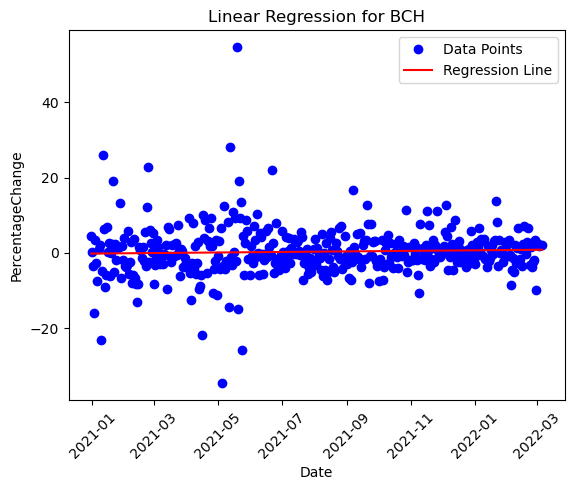

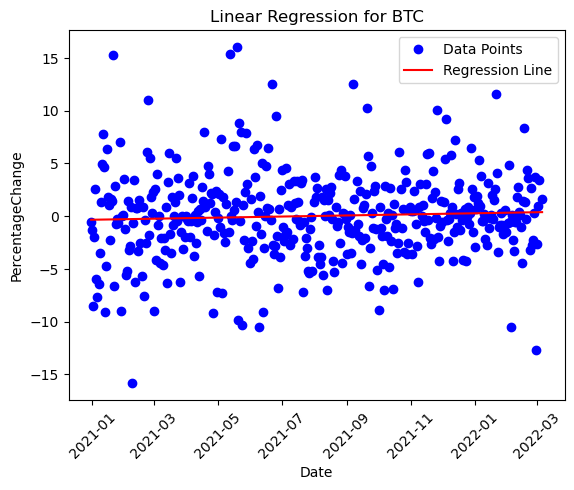

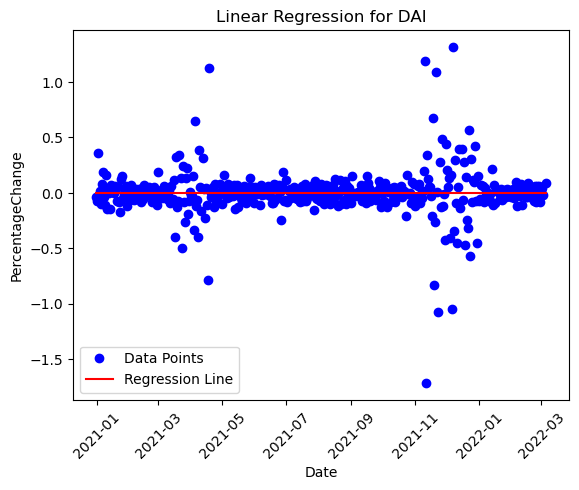

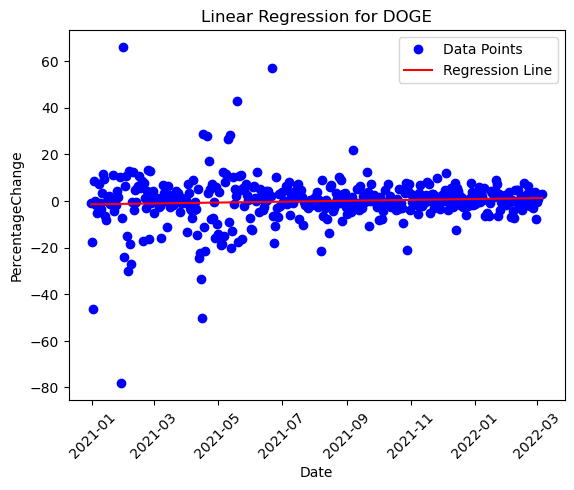

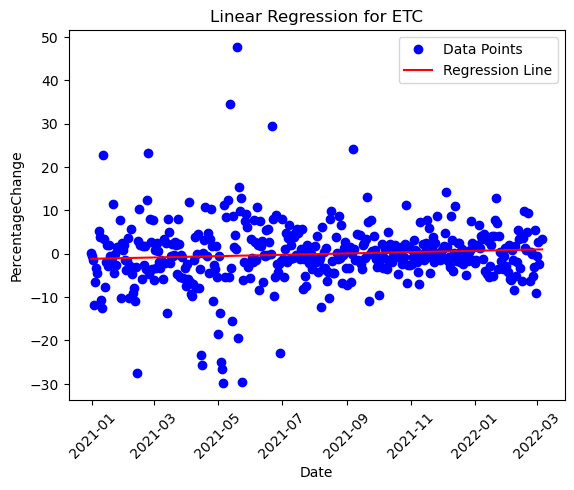

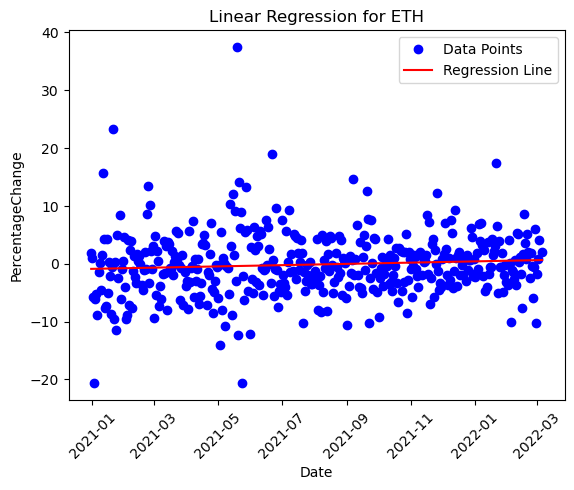

In [16]:

# Group the data by currency
grouped = df.groupby('Currency')

# Perform linear regression for each currency
for currency, data in grouped:
    # Prepare the data
    x_dates = pd.to_datetime(data['Date']).values.astype(float) / 10**9
    y = data['PercentageChange']
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(x_dates.reshape(-1, 1), y)
    
    # Predict the values based on the regression model
    x_pred = pd.date_range(start=pd.to_datetime(data['Date']).min(), end=pd.to_datetime(data['Date']).max(), freq='D').values.astype(float) / 10**9
    y_pred = model.predict(x_pred.reshape(-1, 1))
    
    # Plot the regression line and data points
    plt.plot(pd.to_datetime(data['Date']), y, 'bo', label='Data Points')
    plt.plot(pd.to_datetime(x_pred * 10**9), y_pred, 'r-', label='Regression Line')
    plt.title(f'Linear Regression for {currency}')
    plt.xlabel('Date')
    plt.ylabel('PercentageChange')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.show()


### Average Volatility for Months

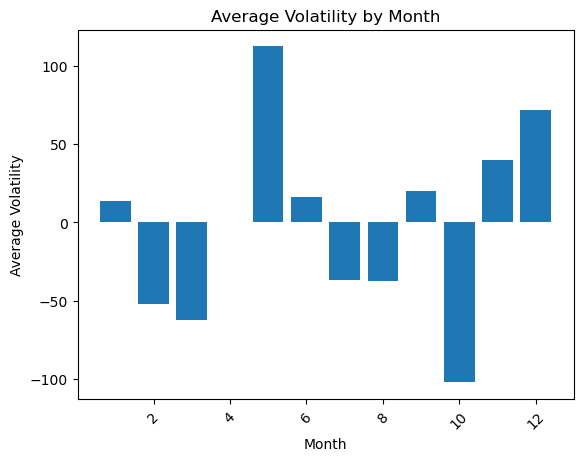

In [17]:
# Load CSV into pandas dataframe
df = pd.read_csv('updated_file.csv')

# Group the data by month and calculate the average volatility
monthly_avg_volatility = df.groupby('Month')['AverageVolatility'].mean()

# Create the bar graph
plt.bar(monthly_avg_volatility.index, monthly_avg_volatility)
plt.title('Average Volatility by Month')
plt.xlabel('Month')
plt.ylabel('Average Volatility')
plt.xticks(rotation=45)

plt.show()

### Average volatility for Currencies

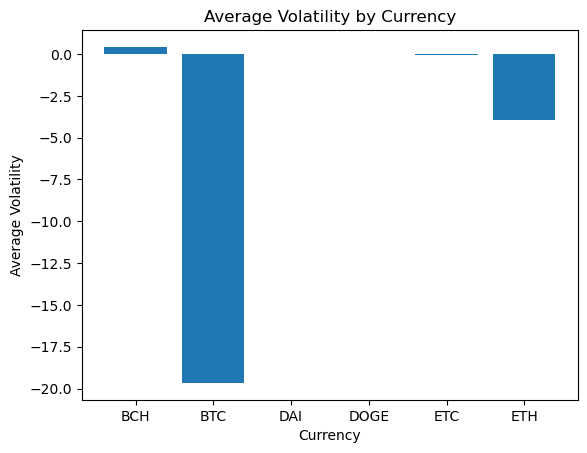

In [18]:
# Group the data by currency and calculate the average volatility
avg_volatility = df.groupby('Currency')['Volatility'].mean()

# Create the bar graph
plt.bar(avg_volatility.index, avg_volatility)
plt.title('Average Volatility by Currency')
plt.xlabel('Currency')
plt.ylabel('Average Volatility')

plt.show()

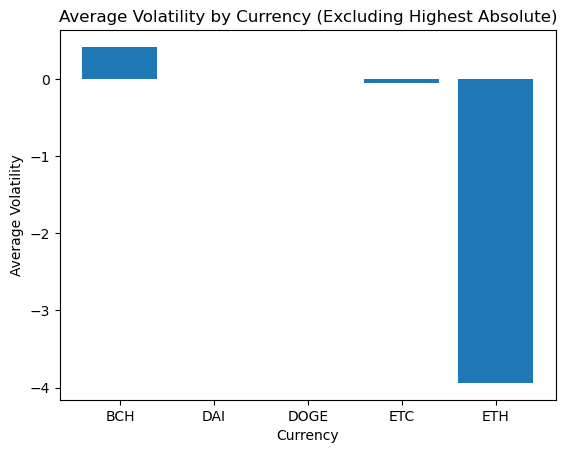

In [19]:
# Group the data by currency and calculate the average volatility
avg_volatility = df.groupby('Currency')['Volatility'].mean()

# Find the currency with the highest absolute value of average volatility
currency_max_volatility = avg_volatility.abs().idxmax()

# Exclude the currency with the highest absolute value of average volatility
filtered_avg_volatility = avg_volatility[avg_volatility.index != currency_max_volatility]

# Create the bar graph
plt.bar(filtered_avg_volatility.index, filtered_avg_volatility)
plt.title('Average Volatility by Currency (Excluding Highest Absolute)')
plt.xlabel('Currency')
plt.ylabel('Average Volatility')

plt.show()

In [20]:
print(avg_volatility)

Currency
BCH      0.421422
BTC    -19.663061
DAI      0.000010
DOGE    -0.000324
ETC     -0.040643
ETH     -3.940411
Name: Volatility, dtype: float64


In [21]:
print(monthly_avg_volatility)

Month
1      13.586257
2     -51.706983
3     -62.307014
4       0.056703
5     112.268686
6      15.963668
7     -36.646614
8     -37.462262
9      19.932025
10   -102.045796
11     39.619183
12     71.464429
Name: AverageVolatility, dtype: float64
